<a href="https://colab.research.google.com/github/Olaadesam/linkadedoin/blob/main/Predicting_Taxi_Fare_New_York_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing Facebook Prophet library

!pip install fbprophet

!pip install pystan 
!pip install pmdarima

In [ ]:
#Importing Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter ('ignore')
from fbprophet import Prophet



In [ ]:
#Mounting Google drive to save data for the prediction
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path = 'drive/My Drive/DATA5000 PROJECT/train.csv' Reading yellow taxi rides

df = pd.read_csv(r'drive/My Drive/DATA5000 PROJECT/train.csv', nrows= 300000, parse_dates=['pickup_datetime'] )  
#Reading data in DataFrame (df)



In [ ]:
#Uploading traffic dataset

df_traffic = pd.read_csv (r'drive/My Drive/DATA5000 PROJECT/Traffic_Volume_Counts__2014-2019_.csv') 

In [ ]:
#Uploading weather dataset

df_weather = pd.read_csv (r'drive/My Drive/DATA5000 PROJECT/Weather.csv') 

In [ ]:
df_weather.head(5)

pickup_datetime  tempm  tempi  dewptm  dewpti   hum  wspdm  wspdi  \
0  2015-12-31 00:15:00    7.8   46.0     6.1    43.0  89.0    7.4    4.6   
1  2015-12-31 00:42:00    7.8   46.0     6.1    43.0  89.0    7.4    4.6   
2  2015-12-31 00:51:00    7.8   46.0     6.1    43.0  89.0    5.6    3.5   
3  2015-12-31 01:51:00    7.2   45.0     5.6    42.1  90.0    7.4    4.6   
4  2015-12-31 02:51:00    7.2   45.0     5.6    42.1  90.0    0.0    0.0   

   wgustm  wgusti  ...  precipm precipi       conds    icon  fog  rain  snow  \
0     NaN     NaN  ...      0.5    0.02  Light Rain    rain    0     1     0   
1     NaN     NaN  ...      0.8    0.03    Overcast  cloudy    0     0     0   
2     NaN     NaN  ...      0.8    0.03    Overcast  cloudy    0     0     0   
3     NaN     NaN  ...      0.3    0.01    Overcast  cloudy    0     0     0   
4     NaN     NaN  ...      NaN     NaN    Overcast  cloudy    0     0     0   

   hail  thunder  tornado  
0     0        0        0  
1     0        0        0  
2     0        0        0  
3     0        0        0  
4     0        0        0  

[5 rows x 30 columns]

In [ ]:
df_traffic.head(5)

ID  Segment ID            Roadway Name             From                To  \
0   2       70376                3 Avenue  East 154 Street   East 155 Street   
1   2       70376                3 Avenue  East 155 Street   East 154 Street   
2  56      176365  Bedford Park Boulevard  Grand Concourse  Valentine Avenue   
3  56      176365  Bedford Park Boulevard  Grand Concourse  Valentine Avenue   
4  62      147673                Broadway  West 242 Street        240 Street   

  Direction        Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  \
0        NB  09/13/2014          204.0        177.0        133.0  ...   
1        SB  09/13/2014          140.0         51.0        128.0  ...   
2        EB  09/13/2014           94.0         73.0         65.0  ...   
3        WB  09/13/2014           88.0         82.0         75.0  ...   
4        SB  09/13/2014          255.0        209.0        149.0  ...   

   2:00-3:00PM  3:00-4:00PM  4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  \
0          520          611          573          546          582   
1          379          376          329          362          418   
2          280          272          264          236          213   
3          237          276          223          240          217   
4          732          809          707          675          641   

   7:00-8:00PM  8:00-9:00PM  9:00-10:00PM  10:00-11:00PM  11:00-12:00AM  
0          528          432           328            282            240  
1          335          282           247            237            191  
2          190          199           183            147            103  
3          198          186           162            157            103  
4          556          546           465            425            324  

[5 rows x 31 columns]

In [ ]:
df_traffic['mean'] = df_traffic.mean(axis=1) #Mean value of the hourly traffic

#df_t.drop('Segment ID',  axis=1).apply(lambda x: x.mean())

# it drops the Region column
#df_t.drop('Segment ID', axis=1,inplace=True)

In [ ]:
df_traffic.head(5)

ID  Segment ID            Roadway Name             From                To  \
0   2       70376                3 Avenue  East 154 Street   East 155 Street   
1   2       70376                3 Avenue  East 155 Street   East 154 Street   
2  56      176365  Bedford Park Boulevard  Grand Concourse  Valentine Avenue   
3  56      176365  Bedford Park Boulevard  Grand Concourse  Valentine Avenue   
4  62      147673                Broadway  West 242 Street        240 Street   

  Direction        Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  \
0        NB  09/13/2014          204.0        177.0        133.0  ...   
1        SB  09/13/2014          140.0         51.0        128.0  ...   
2        EB  09/13/2014           94.0         73.0         65.0  ...   
3        WB  09/13/2014           88.0         82.0         75.0  ...   
4        SB  09/13/2014          255.0        209.0        149.0  ...   

   3:00-4:00PM  4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  7:00-8:00PM  \
0          611          573          546          582          528   
1          376          329          362          418          335   
2          272          264          236          213          190   
3          276          223          240          217          198   
4          809          707          675          641          556   

   8:00-9:00PM  9:00-10:00PM  10:00-11:00PM  11:00-12:00AM         mean  
0          432           328            282            240  3018.269231  
1          282           247            237            191  2945.730769  
2          199           183            147            103  6938.423077  
3          186           162            157            103  6939.384615  
4          546           465            425            324  6123.538462  

[5 rows x 32 columns]

In [ ]:
# add time information to the traffic table
df_traffic['Date'] = pd.to_datetime(df_traffic['Date'])


df_traffic['year'] = df_traffic["Date"].apply(lambda t: t.year)
df_traffic['weekday'] = df_traffic["Date"].apply(lambda t: t.weekday())
df_traffic['month'] = df_traffic['Date'].dt.month
df_traffic['day'] = df_traffic['Date'].dt.day
df_traffic['hour'] = df_traffic["Date"].apply(lambda t: t.hour)

df_traffic['ds'] = pd.DatetimeIndex((df_traffic['year'].apply(str) + '-' + df_traffic['month'].apply(str) + '-' + df_traffic['day'].apply(str))) #Concatenating the dates


In [ ]:
df_traffic.head()

ID  Segment ID            Roadway Name             From                To  \
0   2       70376                3 Avenue  East 154 Street   East 155 Street   
1   2       70376                3 Avenue  East 155 Street   East 154 Street   
2  56      176365  Bedford Park Boulevard  Grand Concourse  Valentine Avenue   
3  56      176365  Bedford Park Boulevard  Grand Concourse  Valentine Avenue   
4  62      147673                Broadway  West 242 Street        240 Street   

  Direction       Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  \
0        NB 2014-09-13          204.0        177.0        133.0  ...   
1        SB 2014-09-13          140.0         51.0        128.0  ...   
2        EB 2014-09-13           94.0         73.0         65.0  ...   
3        WB 2014-09-13           88.0         82.0         75.0  ...   
4        SB 2014-09-13          255.0        209.0        149.0  ...   

   9:00-10:00PM  10:00-11:00PM  11:00-12:00AM         mean  year  weekday  \
0           328            282            240  3018.269231  2014        5   
1           247            237            191  2945.730769  2014        5   
2           183            147            103  6938.423077  2014        5   
3           162            157            103  6939.384615  2014        5   
4           465            425            324  6123.538462  2014        5   

   month  day  hour         ds  
0      9   13     0 2014-09-13  
1      9   13     0 2014-09-13  
2      9   13     0 2014-09-13  
3      9   13     0 2014-09-13  
4      9   13     0 2014-09-13  

[5 rows x 38 columns]

In [ ]:
#Processing traffic dataset

df_traffic = df_traffic.groupby('ds').mean()

In [ ]:
df_traffic

ID    Segment ID  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  \
ds                                                                              
2014-09-13  172.408451  1.868820e+06     319.845070   229.887324   169.126761   
2014-09-14  172.408451  1.868820e+06     360.704225   272.788732   202.014085   
2014-09-15  172.408451  1.868820e+06     188.690141   112.591549    78.802817   
2014-09-16  172.408451  1.868820e+06     172.830986    97.830986    65.929577   
2014-09-17  172.408451  1.868820e+06     179.169014    98.887324    70.901408   
...                ...           ...            ...          ...          ...   
2019-11-20  109.714286  6.305329e+04     336.000000   242.000000   157.285714   
2019-11-21  109.714286  6.305329e+04     432.428571   277.571429   161.571429   
2019-11-22  109.714286  6.305329e+04     463.285714   324.428571   196.142857   
2019-11-23  109.714286  6.305329e+04     461.000000   342.428571   274.142857   
2019-11-24  109.714286  6.305329e+04     445.000000   355.000000   274.428571   

            3:00-4:00AM  4:00-5:00AM  5:00-6:00AM  6:00-7:00AM  7:00-8:00AM  \
ds                                                                            
2014-09-13   139.957746   157.718310   173.492958   274.732394   414.788732   
2014-09-14   163.816901   170.436620   147.253521   203.535211   283.394366   
2014-09-15    75.535211   127.056338   269.901408   615.676056   988.211268   
2014-09-16    62.000000   103.140845   252.774648   614.830986   958.000000   
2014-09-17    62.647887   110.436620   256.929577   629.845070   971.535211   
...                 ...          ...          ...          ...          ...   
2019-11-20   105.285714   102.857143   168.285714   337.428571   513.857143   
2019-11-21   107.285714   105.000000   163.428571   342.142857   535.428571   
2019-11-22   133.428571   117.000000   166.571429   317.571429   525.571429   
2019-11-23   199.714286   165.285714   143.428571   176.142857   269.714286   
2019-11-24   218.571429   160.285714   141.714286   139.857143   189.428571   

            ...  8:00-9:00PM  9:00-10:00PM  10:00-11:00PM  11:00-12:00AM  \
ds          ...                                                            
2014-09-13  ...   650.084507    556.380282     499.211268     419.239437   
2014-09-14  ...   665.394366    531.253521     399.000000     277.000000   
2014-09-15  ...   562.225352    445.000000     341.704225     255.267606   
2014-09-16  ...   594.985915    458.563380     366.873239     267.197183   
2014-09-17  ...   611.774648    493.014085     381.704225     288.732394   
...         ...          ...           ...            ...            ...   
2019-11-20  ...   664.714286    598.285714     536.285714     461.142857   
2019-11-21  ...   662.428571    665.857143     616.857143     542.428571   
2019-11-22  ...   645.714286    602.857143     563.142857     528.142857   
2019-11-23  ...   539.285714    536.571429     499.571429     519.571429   
2019-11-24  ...   525.000000    467.428571     370.285714     342.142857   

                    mean    year  weekday  month   day  hour  
ds                                                            
2014-09-13  72385.451246  2014.0      5.0    9.0  13.0   0.0  
2014-09-14  72354.063922  2014.0      6.0    9.0  14.0   0.0  
2014-09-15  72413.570964  2014.0      0.0    9.0  15.0   0.0  
2014-09-16  72405.407367  2014.0      1.0    9.0  16.0   0.0  
2014-09-17  72418.800650  2014.0      2.0    9.0  17.0   0.0  
...                  ...     ...      ...    ...   ...   ...  
2019-11-20   2884.423077  2019.0      2.0   11.0  20.0   0.0  
2019-11-21   2903.060440  2019.0      3.0   11.0  21.0   0.0  
2019-11-22   2901.587912  2019.0      4.0   11.0  22.0   0.0  
2019-11-23   2848.840659  2019.0      5.0   11.0  23.0   0.0  
2019-11-24   2802.879121  2019.0      6.0   11.0  24.0   0.0  

[422 rows x 32 columns]

In [ ]:
df_traffic = df_traffic.reset_index()[['ds','mean']].rename({'mean':'avg-traffic'}, axis= 'columns')

In [ ]:
df_traffic #final dataset for traffic on the average

ds   avg-traffic
0   2014-09-13  72385.451246
1   2014-09-14  72354.063922
2   2014-09-15  72413.570964
3   2014-09-16  72405.407367
4   2014-09-17  72418.800650
..         ...           ...
417 2019-11-20   2884.423077
418 2019-11-21   2903.060440
419 2019-11-22   2901.587912
420 2019-11-23   2848.840659
421 2019-11-24   2802.879121

[422 rows x 2 columns]

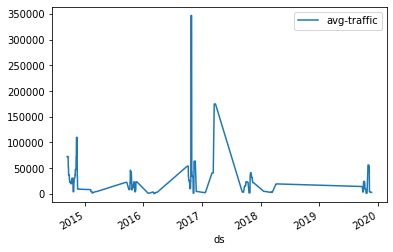

In [ ]:
# given the following data

df_traffic = pd.DataFrame(df_traffic)

# convert the datetime column to a datetime type and assign it back to the column

df_traffic.ds = pd.to_datetime(df_traffic.ds)
df_traffic.plot(x='ds')
plt.show()




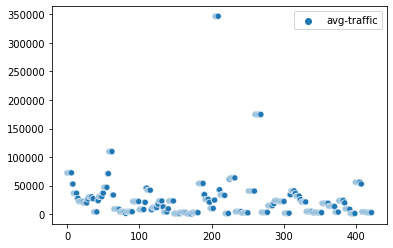

In [ ]:
sns.scatterplot(data = df_traffic)

In [ ]:
df_weather['pickup_datetime'] = pd.to_datetime(df_weather['pickup_datetime'])

In [ ]:
# add time information
df_weather['year'] = df_weather["pickup_datetime"].apply(lambda t: t.year)
df_weather['weekday'] = df_weather["pickup_datetime"].apply(lambda t: t.weekday())
df_weather['month'] = df_weather['pickup_datetime'].dt.month
df_weather['day'] = df_weather['pickup_datetime'].dt.day
df_weather['hour'] = df_weather["pickup_datetime"].apply(lambda t: t.hour)

In [ ]:
df_weather['ds'] = pd.DatetimeIndex((df_weather['year'].apply(str) + '-' + df_weather['month'].apply(str) + '-' + df_weather['day'].apply(str))) #Concatenating the dates


In [ ]:
df_weather = df_weather.groupby('ds')['tempm','pickup_datetime'].mean()

In [ ]:
df_weather

tempm
ds                   
2015-12-31   7.546875
2016-01-01   3.766667
2016-01-02  10.695833
2016-01-03   7.730769
2016-01-04  20.515789
...               ...
2016-12-27  12.045161
2016-12-28   3.279167
2016-12-29   5.343902
2016-12-30   2.189655
2016-12-31   3.504167

[367 rows x 1 columns]

<Figure size 720x36000 with 0 Axes>

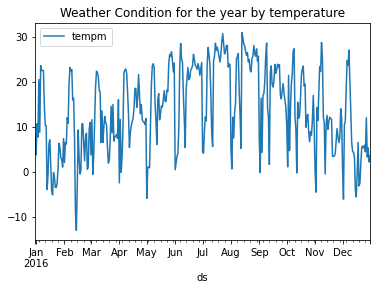

<Figure size 720x36000 with 0 Axes>

In [ ]:
df_weather.plot()
plt.title('Weather Condition for the year by temperature')
plt.figure(figsize=(10,500))

In [ ]:
df.info() #Yellow taxi dataset contaning drop-off and pick-up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                300000 non-null  object             
 1   fare_amount        300000 non-null  float64            
 2   pickup_datetime    300000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   300000 non-null  float64            
 4   pickup_latitude    300000 non-null  float64            
 5   dropoff_longitude  299998 non-null  float64            
 6   dropoff_latitude   299998 non-null  float64            
 7   passenger_count    300000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 18.3+ MB


In [ ]:
train_df = df #Keeping a copy of the dataframe


In [ ]:
train_df.dtypes 

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
train_df = train_df[train_df['fare_amount'] >=0] #Eliminate a situation where the value of fare is less than zero

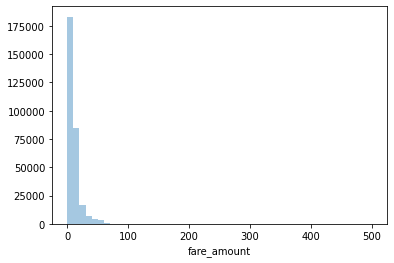

In [ ]:
sns.distplot(train_df['fare_amount'], kde = False) #Ploting the histogram chart of fare amount
#plt.xlim(50,5)

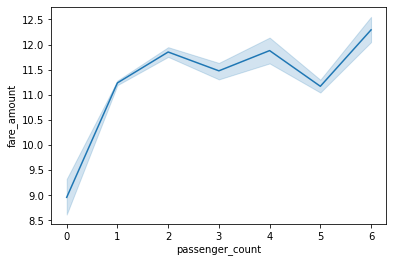

In [ ]:
sns.lineplot(y = train_df['fare_amount'], x = train_df['passenger_count']) #Exploring the relationship between passenger count and fare
#plt.xlim(50,5)

In [ ]:
train_df.corr()

fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.008843        -0.008040   
pickup_longitude      0.008843          1.000000        -0.494933   
pickup_latitude      -0.008040         -0.494933         1.000000   
dropoff_longitude     0.008907          0.758780        -0.673141   
dropoff_latitude     -0.008481         -0.921390         0.488979   
passenger_count       0.012907         -0.002812         0.000854   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                 0.008907         -0.008481         0.012907  
pickup_longitude            0.758780         -0.921390        -0.002812  
pickup_latitude            -0.673141          0.488979         0.000854  
dropoff_longitude           1.000000         -0.798020        -0.001094  
dropoff_latitude           -0.798020          1.000000         0.000645  
passenger_count            -0.001094          0.000645         1.000000

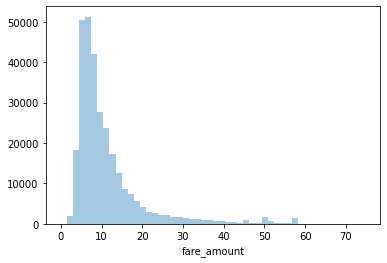

In [ ]:
sns.distplot(train_df[train_df['fare_amount']<75]['fare_amount'], kde = False) #Ploting the histogram chart of fare amount for values less than 75

In [ ]:
train_df.describe() #preview what the dataset look like

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  299985.000000     299985.000000    299985.000000      299983.000000   
mean       11.360763        -72.523159        39.928130         -72.529624   
std         9.932001         11.325422         8.953720          10.914147   
min         0.000000       -740.000000     -3116.285383       -1329.621332   
25%         6.000000        -73.992050        40.734985         -73.991350   
50%         8.500000        -73.981762        40.752737         -73.980116   
75%        12.500000        -73.967097        40.767108         -73.963566   
max       500.000000       2140.601160      1703.092772          40.851027   

       dropoff_latitude  passenger_count  
count     299983.000000    299985.000000  
mean          39.927455         1.684388  
std            6.546461         1.309112  
min        -1189.615440         0.000000  
25%           40.734058         1.000000  
50%           40.753185         1.000000  
75%           40.768095         2.000000  
max          404.616667         6.000000

In [ ]:
train_df.isnull().sum() #checking if there is any null values in the dataframe

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      0
dtype: int64

In [ ]:
train_df = train_df.dropna() #Dropping a null entries

In [ ]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
train_df #Cleaned dataset from null value in the entry

key  fare_amount           pickup_datetime  \
0         2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1         2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2        2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3         2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4       2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   
...                               ...          ...                       ...   
299995    2015-03-17 10:39:36.0000004          4.5 2015-03-17 10:39:36+00:00   
299996    2012-10-01 09:59:32.0000001          9.0 2012-10-01 09:59:32+00:00   
299997  2012-12-10 21:59:00.000000197         11.0 2012-12-10 21:59:00+00:00   
299998    2014-03-03 11:14:53.0000001          5.5 2014-03-03 11:14:53+00:00   
299999    2015-03-14 13:35:54.0000006          6.0 2015-03-14 13:35:54+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.844311        40.721319         -73.841610   
1             -74.016048        40.711303         -73.979268   
2             -73.982738        40.761270         -73.991242   
3             -73.987130        40.733143         -73.991567   
4             -73.968095        40.768008         -73.956655   
...                  ...              ...                ...   
299995        -74.002090        40.729954         -73.995422   
299996        -74.003177        40.747336         -73.983265   
299997        -73.988432        40.720217         -73.994832   
299998        -73.980647        40.721606         -73.994044   
299999        -73.958839        40.815304         -73.966675   

        dropoff_latitude  passenger_count  
0              40.712278                1  
1              40.782004                1  
2              40.750562                2  
3              40.758092                1  
4              40.783762                1  
...                  ...              ...  
299995         40.739185                2  
299996         40.746194                1  
299997         40.746707                1  
299998         40.727628                1  
299999         40.804443                4  

[299983 rows x 8 columns]

In [ ]:
#loading the train dataset

test_df2 = pd.read_csv(r'drive/My Drive/DATA5000 PROJECT/test.csv')  
#Reading data in DataFrame (df)


In [ ]:
Long = - 73.935242
Lat = 40.730610 
#Longitude and Latitude of the city center of New York City

Defining the boundaries of the test area

In [ ]:
print(min(test_df2['pickup_longitude'].min(),test_df2['dropoff_longitude'].min())) #Finding the minimum value of the longitude test dataset

-74.263242


In [ ]:
print(max(test_df2['pickup_longitude'].max(),test_df2['dropoff_longitude'].max()))

-72.986532


In [ ]:
print(min(train_df['pickup_longitude'].min(),train_df['dropoff_longitude'].min())) #Finding the minimum value of the longitude test dataset

-1329.621332


In [ ]:
print(max(train_df['pickup_longitude'].max(),train_df['dropoff_longitude'].max()))

2140.60116


In [ ]:
print(min(test_df2['pickup_latitude'].min(),test_df2['dropoff_latitude'].min()))

40.568973


In [ ]:
print(max(test_df2['pickup_latitude'].max(),test_df2['dropoff_latitude'].max())) 

41.709555


In [ ]:
print(min(train_df['pickup_latitude'].min(),train_df['dropoff_latitude'].min())) 

-3116.285383


In [ ]:
print(max(train_df['pickup_latitude'].max(),train_df['dropoff_latitude'].max())) 

1703.092772


Selecting a boundary area

In [ ]:
# this function is to select the boundaries and will be used for both test and train dataset
def select_within_boundingbox(df, BBa):
    return (df.pickup_longitude >= BBa[0]) & (df.pickup_longitude <= BBa[1]) & \
           (df.pickup_latitude >= BBa[2]) & (df.pickup_latitude <= BBa[3]) & \
           (df.dropoff_longitude >= BBa[0]) & (df.dropoff_longitude <= BBa[1]) & \
           (df.dropoff_latitude >= BBa[2]) & (df.dropoff_latitude <= BBa[3])

In [ ]:
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)

In [ ]:
pip install --upgrade certifi

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

In [ ]:
# load extra image to zoom in on NYC
BB_Zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [ ]:
train_df = train_df[select_within_boundingbox(train_df, BB)]

In [ ]:
print('Old size: %d' % len(train_df))
train_df = train_df[select_within_boundingbox(train_df, BB)]
print('New size: %d' % len(train_df))

Old size: 293740
New size: 293740


Plot data on map

In [ ]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    #axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='r', s=s)
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)
    #axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"] , alpha = alpha, c='b', s=s)
    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

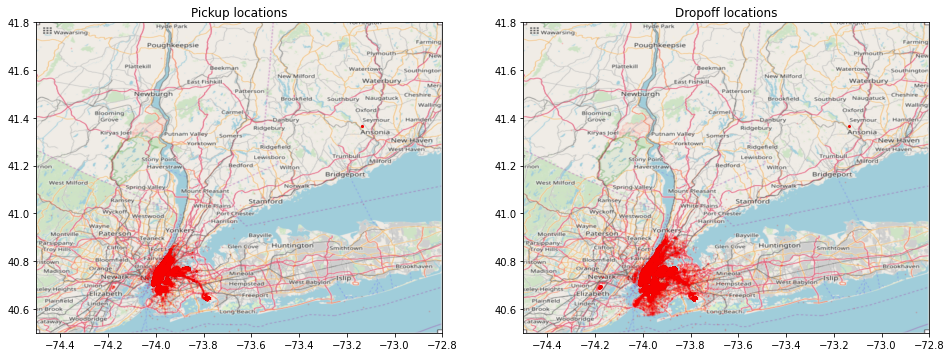

In [ ]:
# plot training data on map
plot_on_map(train_df, BB, nyc_map, s=1, alpha=0.1)

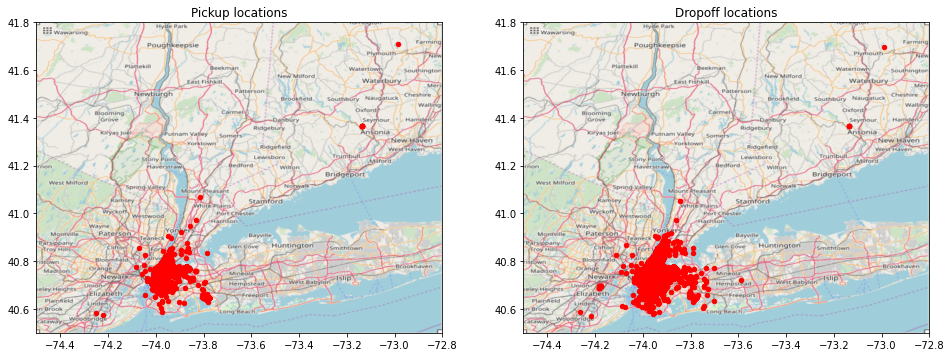

In [ ]:
# plot test data on map
plot_on_map(test_df2, BB, nyc_map, alpha=1.0, s=20)

Data Visualization of the train dataset

In [ ]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

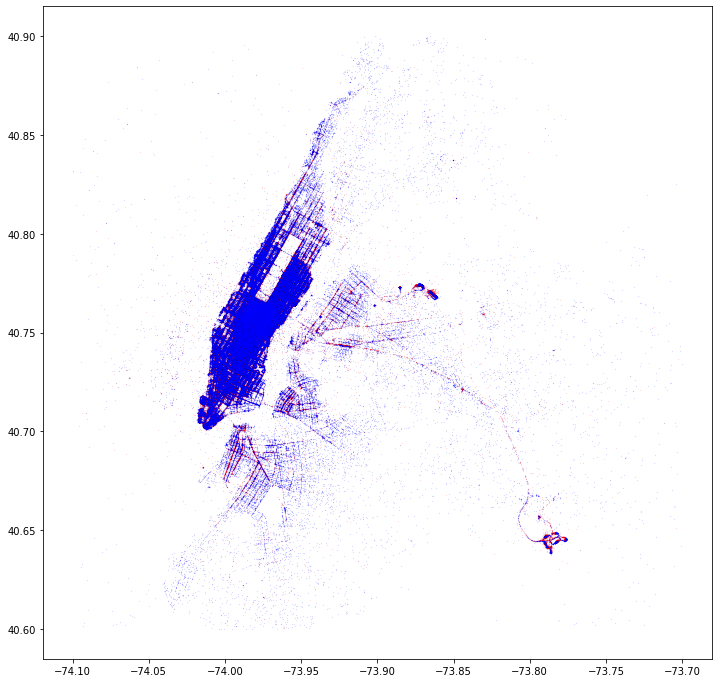

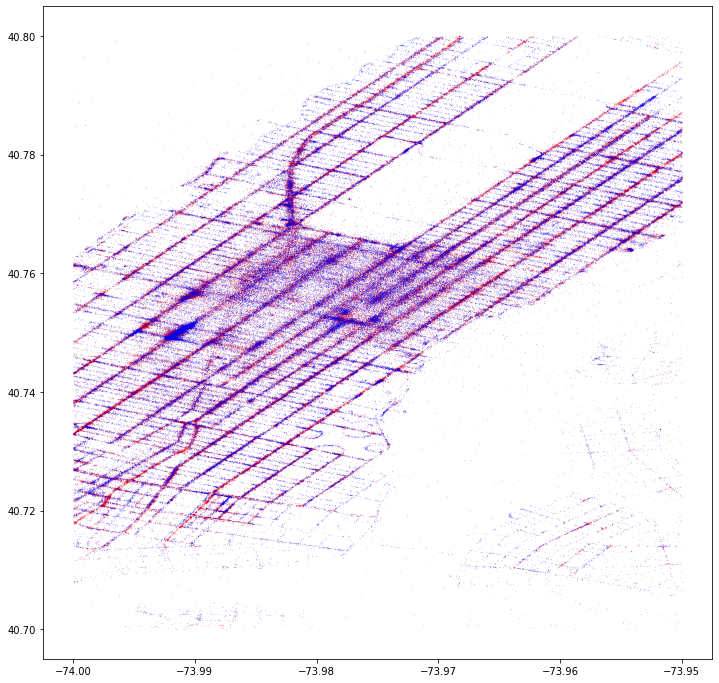

In [ ]:
plot_hires(train_df, (-74.1, -73.7, 40.6, 40.9))
plot_hires(train_df, (-74, -73.95, 40.7, 40.8))

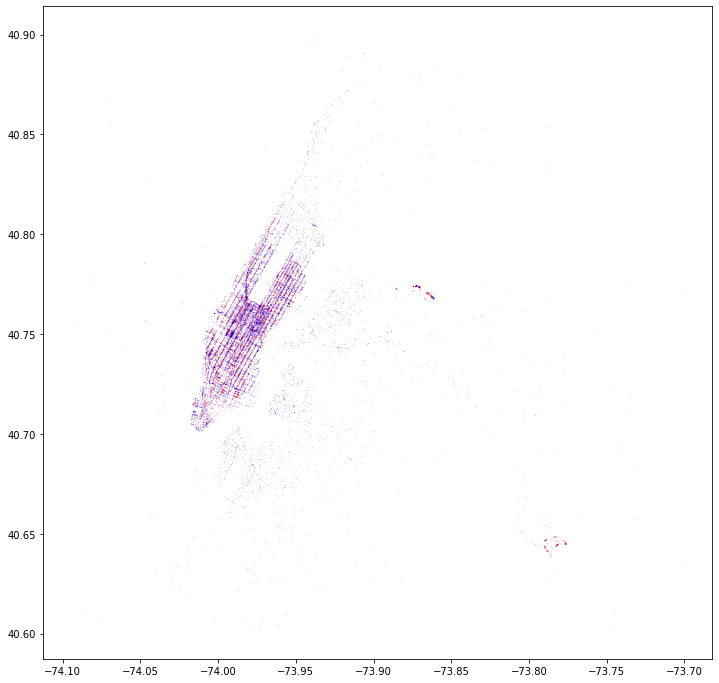

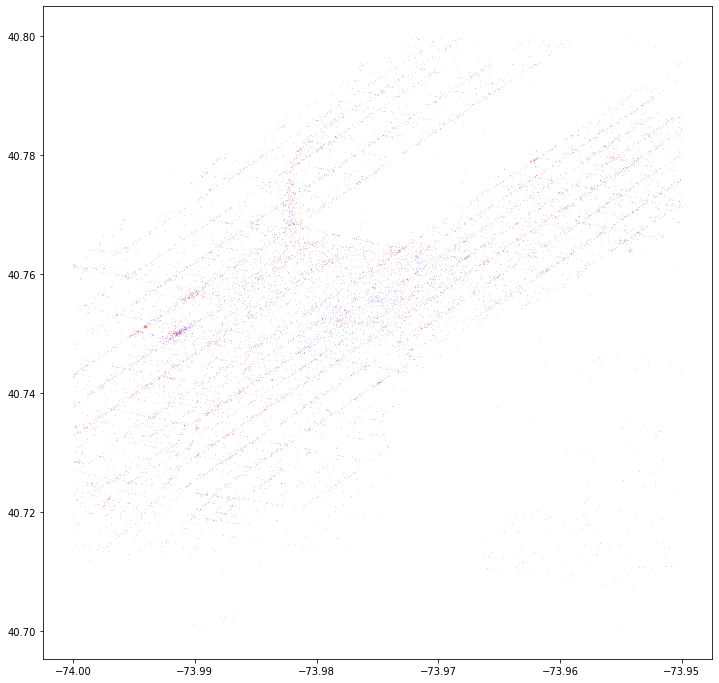

In [ ]:
plot_hires(test_df2, (-74.1, -73.7, 40.6, 40.9))
plot_hires(test_df2, (-74, -73.95, 40.7, 40.8)) #To further view the look of the graph

In [ ]:
train_df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [ ]:
test_df2.head()

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [ ]:
# add time information
train_df['year'] = train_df["pickup_datetime"].apply(lambda t: t.year)
train_df['weekday'] = train_df["pickup_datetime"].apply(lambda t: t.weekday())
train_df['month'] = train_df['pickup_datetime'].dt.month
train_df['day'] = train_df['pickup_datetime'].dt.day
train_df['hour'] = train_df["pickup_datetime"].apply(lambda t: t.hour)

In [ ]:
train_df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  month  day  hour  
0                1  2009        0      6   15    17  
1                1  2010        1      1    5    16  
2                2  2011        3      8   18     0  
3                1  2012        5      4   21     4  
4                1  2010        1      3    9     7

In [ ]:
df = train_df #duplicating the dataset

In [ ]:
df.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
weekday                            int64
month                              int64
day                                int64
hour                               int64
dtype: object

In [ ]:
#concatinating the data as string to get the results to create a new field as ds

df['ds'] = pd.DatetimeIndex((df['year'].apply(str) + '-' + df['month'].apply(str) + '-' + df['day'].apply(str)))


In [ ]:
df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  month  day  hour         ds  
0                1  2009        0      6   15    17 2009-06-15  
1                1  2010        1      1    5    16 2010-01-05  
2                2  2011        3      8   18     0 2011-08-18  
3                1  2012        5      4   21     4 2012-04-21  
4                1  2010        1      3    9     7 2010-03-09

In [ ]:
train_df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  month  day  hour         ds  
0                1  2009        0      6   15    17 2009-06-15  
1                1  2010        1      1    5    16 2010-01-05  
2                2  2011        3      8   18     0 2011-08-18  
3                1  2012        5      4   21     4 2012-04-21  
4                1  2010        1      3    9     7 2010-03-09

Distance and Time Visualization

The longer the distance between pickup and dropoff locations, the higher the fare.
Some trips, like to/from an airport are fixed fee.
Fare at night is different from the day time.

**Formula to be used for calculating the distance between latitude and longitude**

In [ ]:

def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

The longer the distance between pickup and dropoff location, higher the fare. Adding new column to dataframe with distance in miles
In Calculating the distance


In [ ]:
train_df["distance_in_miles"] = distance(train_df["pickup_latitude"], train_df["pickup_longitude"], 
                                      train_df["dropoff_latitude"], train_df["dropoff_longitude"])

In [ ]:
train_df.head() #view the dataframe

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  month  day  hour         ds  \
0                1  2009        0      6   15    17 2009-06-15   
1                1  2010        1      1    5    16 2010-01-05   
2                2  2011        3      8   18     0 2011-08-18   
3                1  2012        5      4   21     4 2012-04-21   
4                1  2010        1      3    9     7 2010-03-09   

   distance_in_miles  
0           0.640487  
1           5.250670  
2           0.863411  
3           1.739386  
4           1.242218

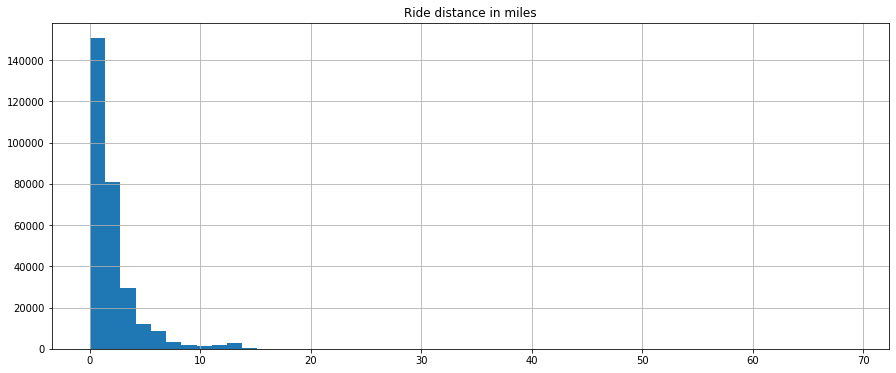

In [ ]:
train_df["distance_in_miles"].hist(bins=50, figsize=(15,6))
plt.title("Ride distance in miles");

In [ ]:
train_df.groupby('passenger_count')['distance_in_miles','fare_amount'].mean() #visualizing the effect of categories

distance_in_miles  fare_amount
passenger_count                                
0                         1.760970     8.861611
1                         2.042830    11.212283
2                         2.184803    11.838162
3                         2.101556    11.481859
4                         2.165596    11.844849
5                         2.066798    11.175367
6                         2.156059    12.292855

Scatter Plot distance vs Fare. Visualizing the relevance in the data

Text(0.5, 1.0, 'Zoom in on distance < 15 miles and fare < $100')

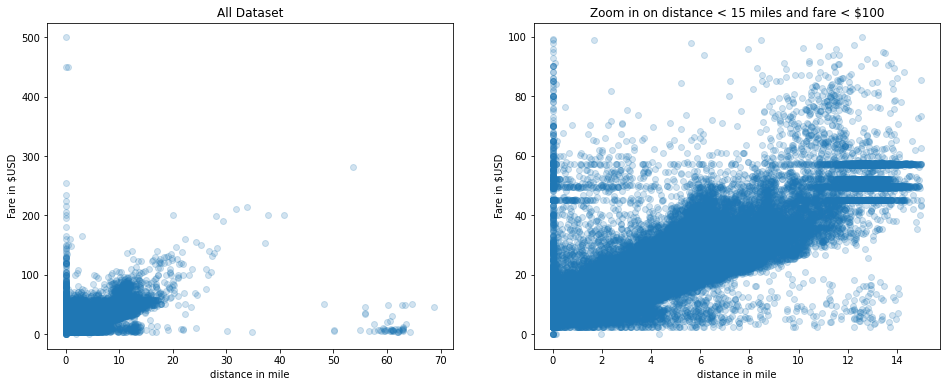

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(train_df["distance_in_miles"], train_df["fare_amount"], alpha=0.2)
axs[0].set_xlabel("distance in mile")
axs[0].set_ylabel("Fare in $USD")
axs[0].set_title("All Dataset")

# Zoom-in some part of the data
idx = ((train_df['distance_in_miles'] < 15) & (train_df["fare_amount"] < 100))
axs[1].scatter(train_df[idx]["distance_in_miles"], train_df[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance in mile")
axs[1].set_ylabel("Fare in $USD")
axs[1].set_title("Zoom in on distance < 15 miles and fare < $100")

In [ ]:
# remove datapoints with distance <0.05 miles
idx = (train_df["distance_in_miles"] >= 0.05)
print('Old size: %d' % len(train_df))
train_df = train_df[idx]
print('New size: %d' % len(train_df))

Old size: 293740
New size: 289022


JF Kennedy International Airport coordinate

In [ ]:
jfk = (-73.7822222222,40.6441666667)
nyc = (-74.0063889, 40.7141667)

In [ ]:
def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    idx = (distance(train_df["pickup_latitude"], train_df["pickup_longitude"], loc[1], loc[0]) < range)
    train_df[idx]["fare_amount"].hist(bins = 100, ax=axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} miles of {}".format(range, name))
    
    idx = (distance(train_df["dropoff_latitude"], train_df["dropoff_longitude"], loc[1], loc[0]) < range)
    train_df[idx]["fare_amount"].hist(bins=100, ax=axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} miles of {}".format(range, name))

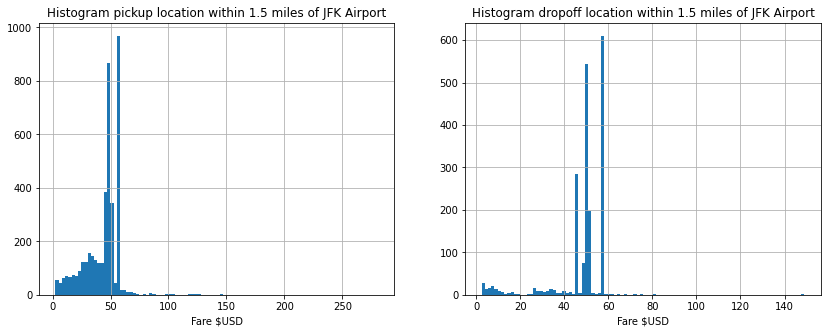

In [ ]:
plot_location_fare(jfk, 'JFK Airport')

In [ ]:
#Other major locations in NYC
cnh = (-74.017, 40.714) #Conrad Hotel New York
ewr = (-74.175, 40.69) #Newark Liberty International Airport https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) #Laguardia Airport, https://www.travelmath.com/airport/LGA

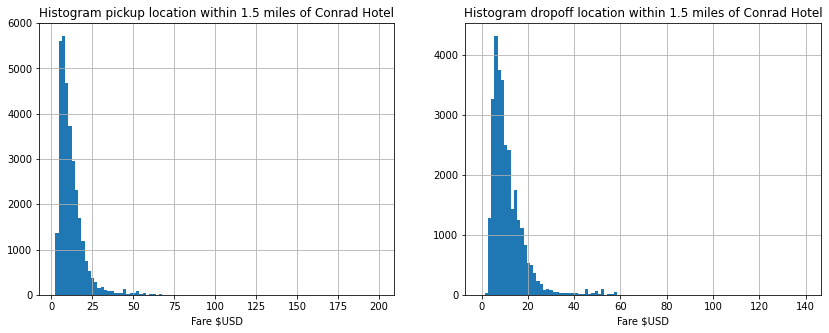

In [ ]:
plot_location_fare(cnh, 'Conrad Hotel')

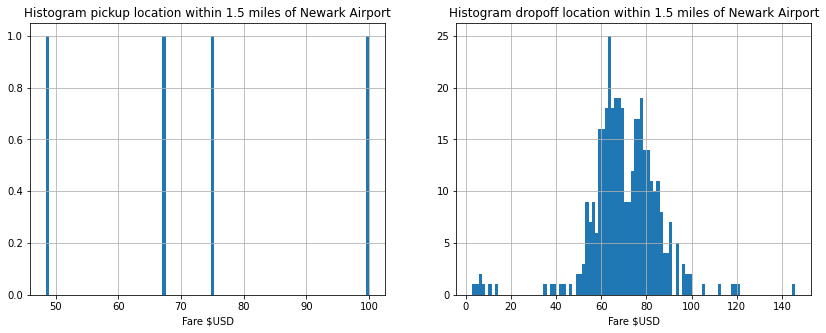

In [ ]:
plot_location_fare(ewr, 'Newark Airport')

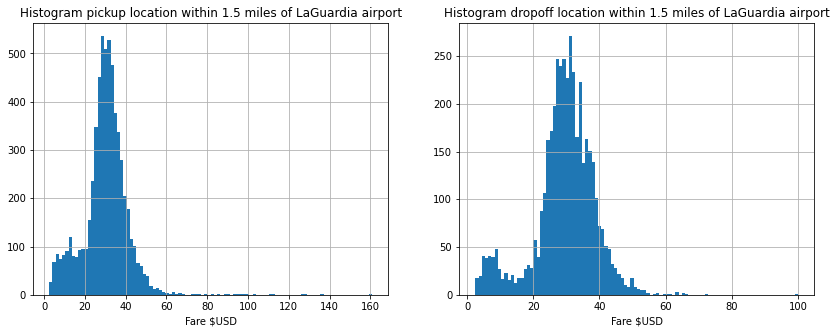

In [ ]:
plot_location_fare(lgr, 'LaGuardia airport')

Night Fare is different from day time

In [ ]:
train_df["fare_per_mile"] = train_df["fare_amount"] / train_df["distance_in_miles"]

In [ ]:
train_df["fare_per_mile"].describe()

count    289022.000000
mean          7.423963
std          14.939461
min           0.000000
25%           4.769120
50%           6.131214
75%           8.067664
max        3812.571628
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance in mile')

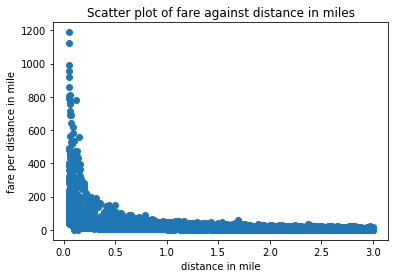

In [ ]:
idx = (train_df["distance_in_miles"] < 3) & (train_df["fare_amount"] < 100)
plt.scatter(train_df[idx]["distance_in_miles"], train_df[idx]["fare_per_mile"])
plt.title("Scatter plot of fare against distance in miles")
plt.xlabel("distance in mile")
plt.ylabel("fare per distance in mile")

Plotting a Pivot Table

In [ ]:
train_df.pivot_table("fare_per_mile", index="hour", columns="ds") #Check the result of this table

ds    2009-01-01  2009-01-02  2009-01-03  2009-01-04  2009-01-05  2009-01-06  \
hour                                                                           
0       7.999700    6.308447    6.875082    5.908351    3.757861    8.172236   
1       6.124352    7.242050    7.188665    5.398803         NaN         NaN   
2       5.054085    4.110701    6.994711    7.529815    2.762386         NaN   
3       5.479209         NaN    4.134453    4.207042         NaN    5.102941   
4       6.290709         NaN    4.407376    4.755903         NaN    4.325294   
5       3.593052         NaN         NaN    3.002922         NaN         NaN   
6            NaN    8.716835         NaN    6.989794    4.656535    3.283999   
7       2.847854    5.498243    8.252855         NaN    7.596289    5.862805   
8            NaN    4.281611    6.314071         NaN    5.032638    5.887726   
9            NaN    7.079526    5.664553    3.376458    8.100540    7.880171   
10      5.824734    4.993129    7.766455    8.847400    7.758437    2.612242   
11      4.528611    6.155485    4.173715    5.437691    7.784431   10.115003   
12      5.643226    6.933682    7.443837    6.510975    6.073856    6.704529   
13      4.749846    7.084829    8.513898    6.431306    7.218985    7.194395   
14      5.160004    4.503555    7.361823    4.961624    6.308692    9.268082   
15      7.691573    9.488923    6.645999    5.052821   18.981734    7.566524   
16      5.750862    7.094406    4.452830    7.193427   10.173755    7.814975   
17      5.445609    5.551517    6.976246    4.901054    6.624018   23.997387   
18      6.350334   11.099505    5.158513    5.540320    7.358209    6.296964   
19      5.730230    5.428975    4.144683    5.071709    5.699424   10.271089   
20      7.074809    5.618603    4.744173    4.724273    4.972019    6.597186   
21      8.637042    6.036977    6.487060    5.060229    4.117943    4.953848   
22      8.951937    7.190798    5.707105    5.225903    5.088598   13.723769   
23      9.901140    5.546233    6.856500    4.947735    4.895279    6.631206   

ds    2009-01-07  2009-01-08  2009-01-09  2009-01-10  ...  2015-06-21  \
hour                                                  ...               
0       5.570165    4.213887    5.846553    7.164236  ...    7.076076   
1       6.035942    5.238047    5.198877    7.536810  ...    4.661368   
2      10.000501    9.858570    4.482909    5.453303  ...    5.970602   
3            NaN    5.198223    4.104776    7.104574  ...    5.647863   
4            NaN   16.616393    5.000828    6.579757  ...    6.658708   
5       5.777126    6.540816         NaN         NaN  ...    5.317237   
6       5.857733    4.274810    7.965523    5.232165  ...    6.026127   
7       8.378407    5.683231    5.186679         NaN  ...         NaN   
8       5.752647    7.583629    6.763452    4.317350  ...    6.537884   
9       6.777383    6.561134    4.359452    3.874670  ...    5.848744   
10      5.054927         NaN    6.728112    6.517722  ...    5.659276   
11      8.045370    8.860671    7.029497    6.426274  ...    6.781144   
12      5.305695   15.178121    9.004741    4.554254  ...    5.865407   
13      8.682931    7.089536    6.124751    6.265066  ...    6.472457   
14      6.133612    6.134935    5.971290    7.385452  ...    7.598969   
15      6.687997   10.328991    9.224076    6.886138  ...    7.026116   
16      7.644302    6.650808    5.891447    7.194680  ...    6.767870   
17      7.367447    7.131936    7.423628    4.834504  ...    5.863652   
18      6.516681    6.234638    7.653862    5.496071  ...    6.769981   
19      6.411331    8.089675    7.816101    6.567644  ...    6.955698   
20      5.596205    7.231351    6.480881    6.259317  ...    6.273236   
21      5.789356    7.181529    9.120231    7.179325  ...    6.169251   
22      5.139593    4.369068    5.136914    6.509736  ...    8.784994   
23      3.993498    6.661716    5.401025    6.836922  ...    5.093623   

ds    2015-06-22  20

Text(0, 0.5, 'Fare in $USD per mile')

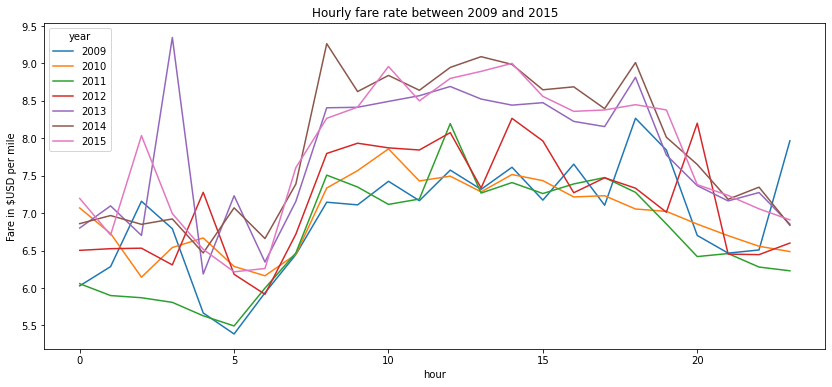

In [ ]:
train_df.pivot_table("fare_per_mile", index="hour", columns="year").plot(figsize=(14,6))
plt.title("Hourly fare rate between 2009 and 2015")
plt.ylabel("Fare in $USD per mile")

**Fare and Time Dependency Per Year**

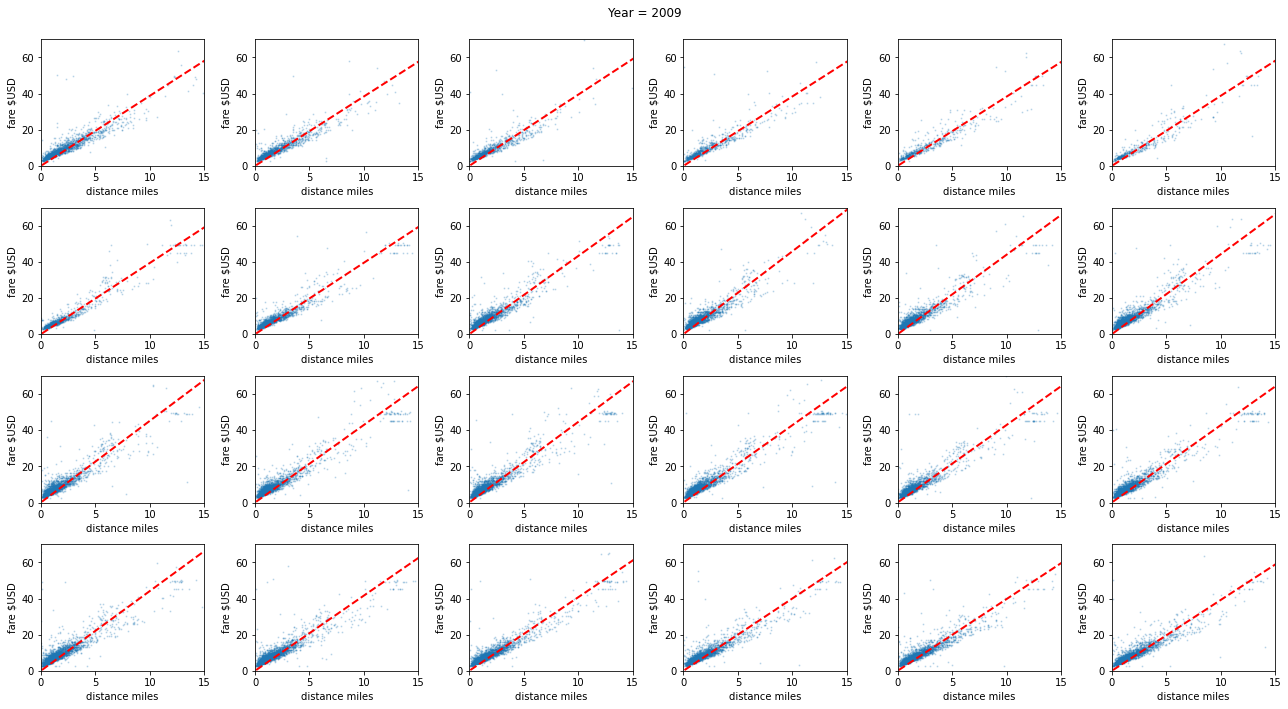

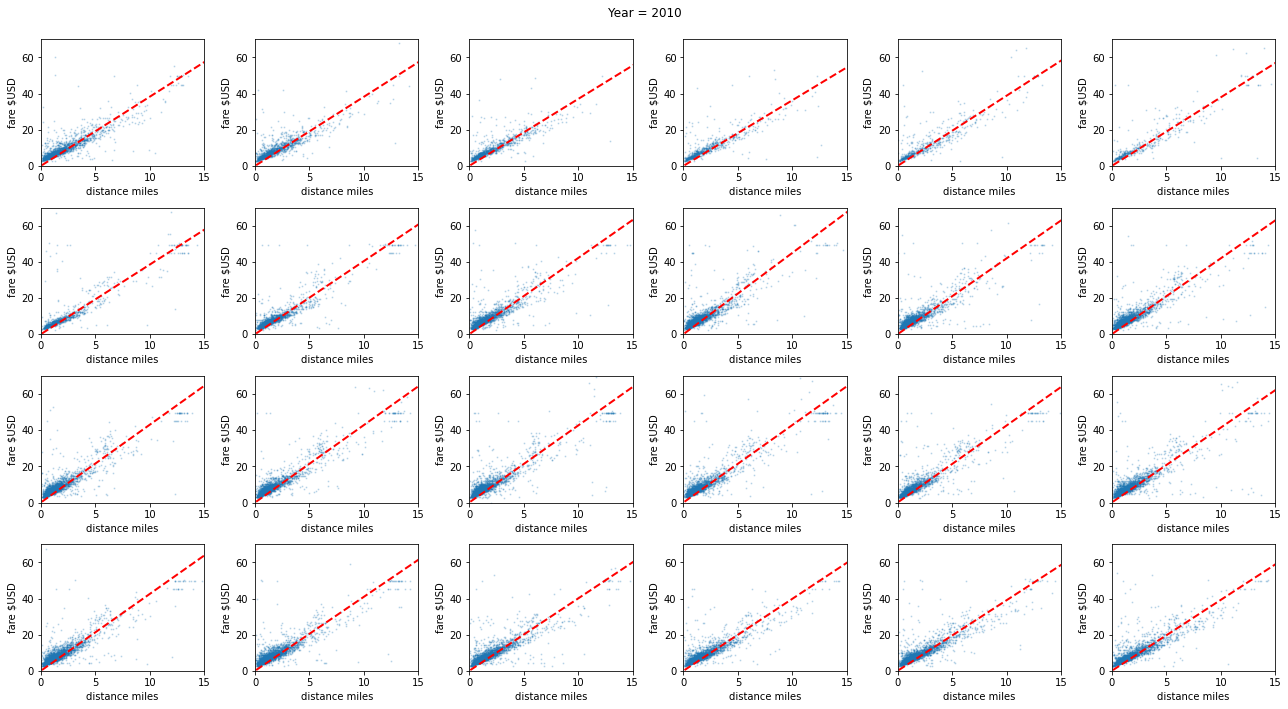

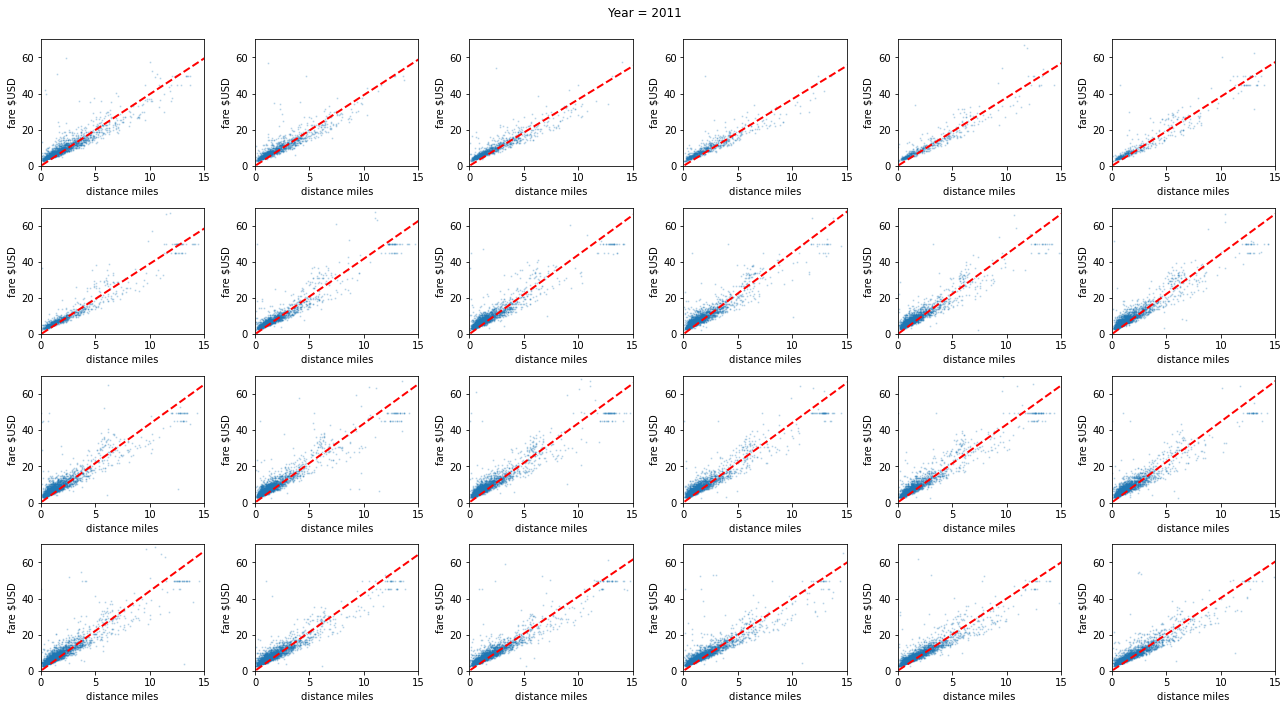

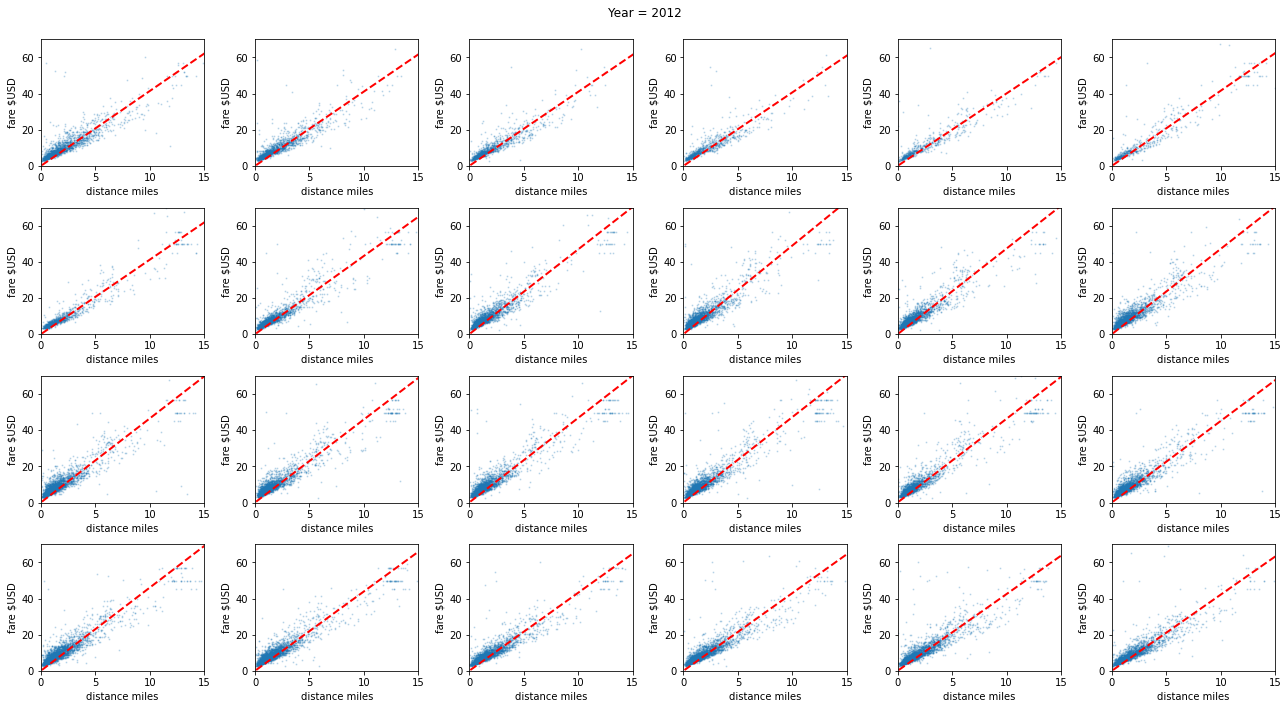

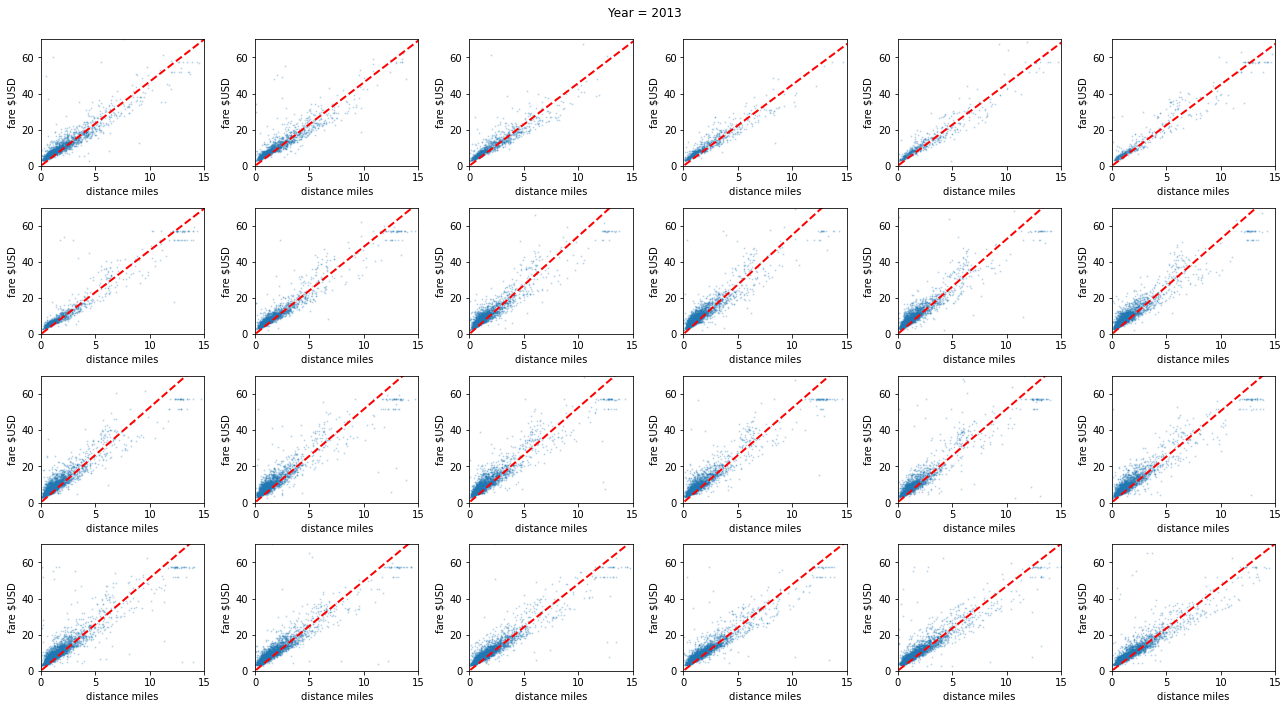

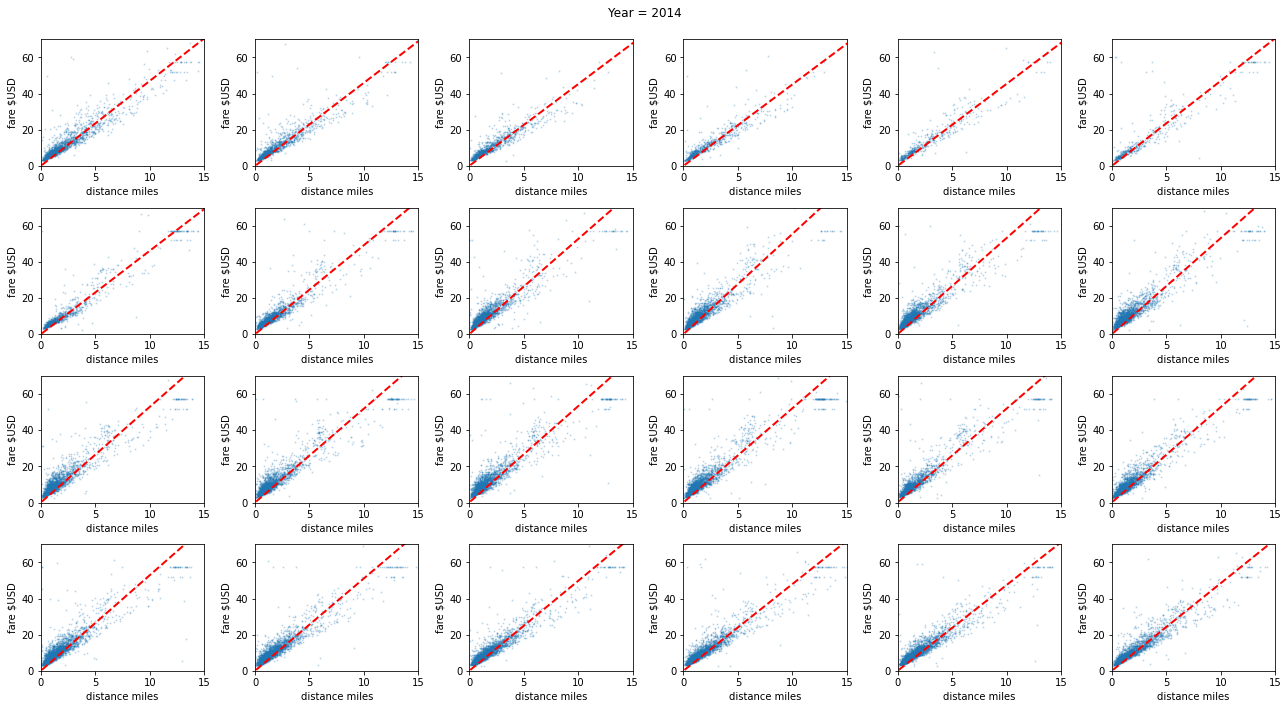

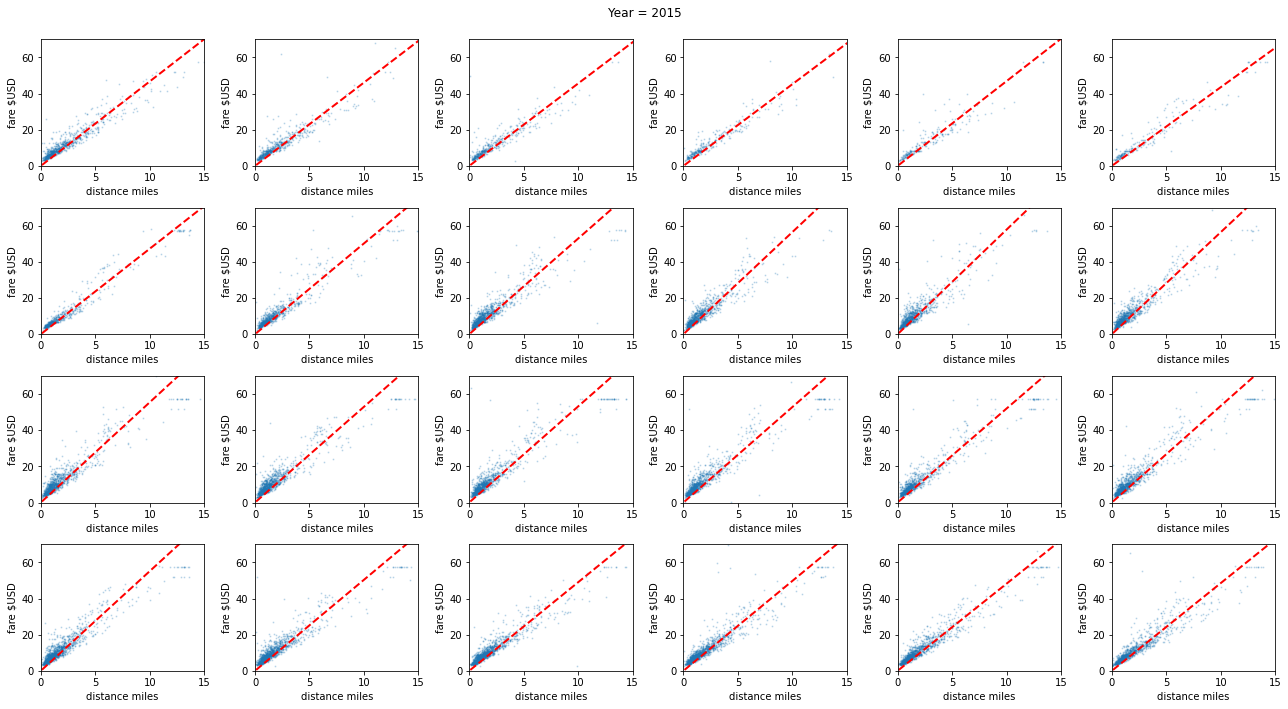

In [ ]:
#Fitting the dataset to be trained

from sklearn.linear_model import LinearRegression

# plot all years
for year in train_df["year"].unique():
    
    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    # plot for all hours
    
    for h in range(24):
        idx = (train_df["distance_in_miles"] < 15) & (train_df["fare_amount"] < 100) & (train_df["hour"] == h) & \
              (train_df["year"] == year)
        axs[h].scatter(train_df[idx]["distance_in_miles"], train_df[idx]["fare_amount"], alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))
        
        model = LinearRegression(fit_intercept=False)
        
        X, y = train_df[idx]["distance_in_miles"].values.reshape(-1,1), train_df[idx]["fare_amount"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c='r', lw=2)
        
    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

**Relevance of direction for calculation of fare amount**

In [ ]:
train_df["delta_lon"] = train_df["pickup_longitude"] - train_df["dropoff_longitude"]
train_df["delta_lat"] = train_df["pickup_latitude"] - train_df["dropoff_latitude"]

**Select trips in Manhattan**

In [ ]:
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(train_df, BB_manhattan)

Text(0.5, 1.0, 'Distance by coordinate with fare_amount')

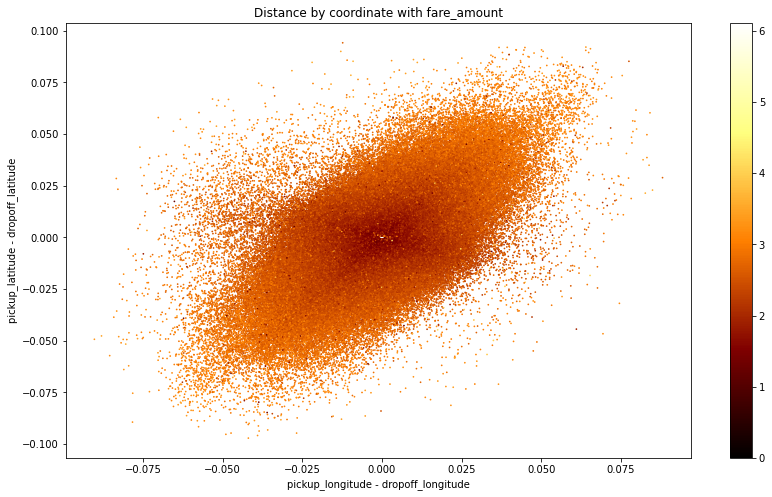

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(train_df[idx_manhattan]["delta_lon"], train_df[idx_manhattan]["delta_lat"], s=0.5, alpha=1.0,
            c=np.log1p(train_df[idx_manhattan]["fare_amount"]), cmap="afmhot")
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latitude')
plt.title('Distance by coordinate with fare_amount')

**Looks like direction of the trip seems to matter. Direction of a trip, from 180 to -180 degrees. Horizontal axes = 0**

In [ ]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [ ]:
train_df['direction'] = calculate_direction(train_df.delta_lon, train_df.delta_lat)

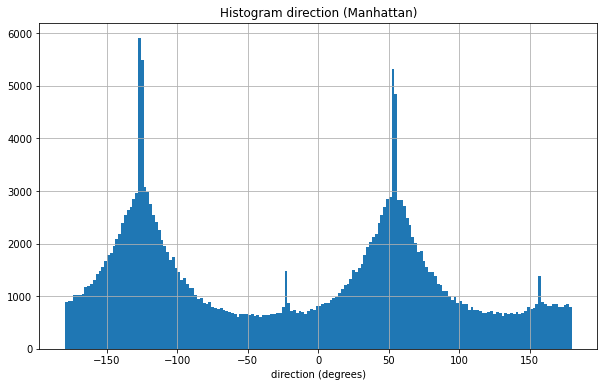

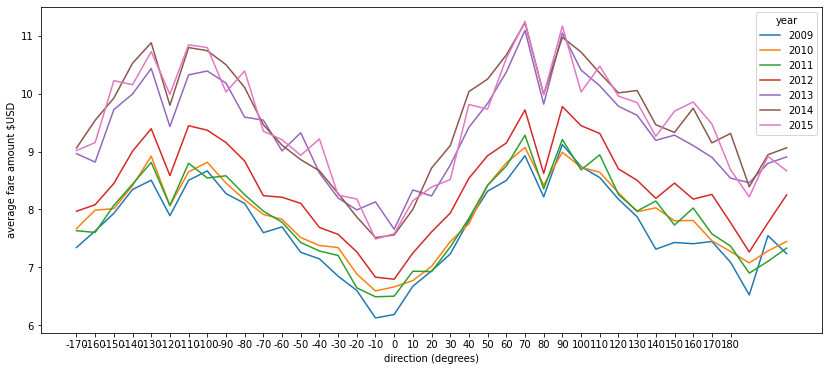

In [ ]:
# plot histogram of directions
plt.figure(figsize=(10,6))
train_df[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')

# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(train_df[idx_manhattan]['direction'], np.linspace(-180, 180, 40))

train_df[idx_manhattan].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)

plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

**Fare varies with pickup location**

In [ ]:
# add new column to dataframe with distance in mile
train_df['distance_to_center'] = distance(nyc[1], nyc[0], train_df["pickup_latitude"], train_df["pickup_longitude"])

In [ ]:
new_train_df = train_df.groupby('ds')['distance_in_miles','fare_amount', 'fare_per_mile'].mean() #Grouping the dataset based on date

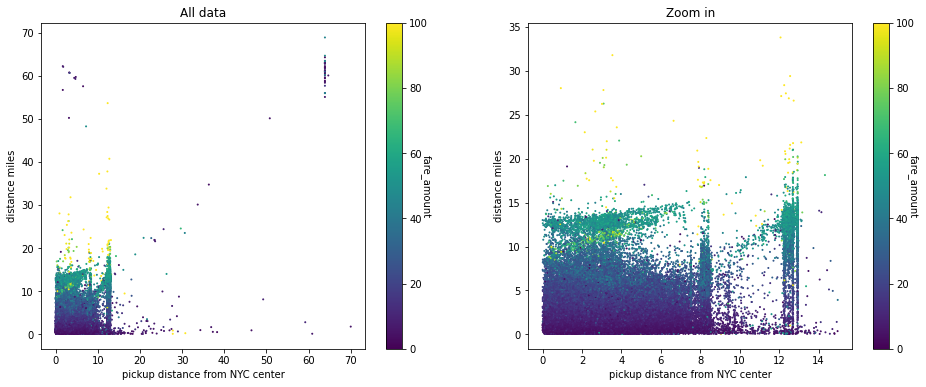

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(train_df["distance_to_center"], train_df["distance_in_miles"], c=np.clip(train_df["fare_amount"], 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)

axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')

cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)


idx = (train_df["distance_to_center"] < 15) & (train_df["distance_in_miles"] < 35)
im = axs[1].scatter(train_df[idx]["distance_to_center"], train_df[idx]["distance_in_miles"], 
                     c=np.clip(train_df[idx]["fare_amount"], 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

There is a lot of 'green' dots, which is about $50 to $60 fare amount near 13 miles distance of NYC center of distrance of trip. This could be due to trips from/to JFK airport
Baseline Model and Submission

**Dataset to be passed into the trained model**

In [ ]:
train_df['year']

0         2009
1         2010
2         2011
3         2012
4         2010
          ... 
299995    2015
299996    2012
299997    2012
299998    2014
299999    2015
Name: year, Length: 289022, dtype: int64

Building model for the prediction after feature engineering
**Using Prophet to carry out the forcasting**

In [ ]:
new_train_df

distance_in_miles  fare_amount  fare_per_mile
ds                                                       
2009-01-01           1.913454     9.486500       6.227473
2009-01-02           1.899561     9.941919       6.863177
2009-01-03           2.474868    11.711261       6.443284
2009-01-04           2.475469    10.982692       5.644098
2009-01-05           1.685405     8.428947       6.816328
...                       ...          ...            ...
2015-06-26           2.185862    13.611130       8.299882
2015-06-27           1.650825    10.649839       8.307258
2015-06-28           2.434780    14.808831       8.255978
2015-06-29           2.114010    14.317160      12.344723
2015-06-30           1.884828    11.733608       7.658998

[2372 rows x 3 columns]

In [ ]:
new_df = new_train_df.reset_index()[['ds','distance_in_miles','fare_amount','fare_per_mile']].rename({'fare_amount':'y'}, axis= 'columns')

In [ ]:
new_df

ds  distance_in_miles          y  fare_per_mile
0    2009-01-01           1.913454   9.486500       6.227473
1    2009-01-02           1.899561   9.941919       6.863177
2    2009-01-03           2.474868  11.711261       6.443284
3    2009-01-04           2.475469  10.982692       5.644098
4    2009-01-05           1.685405   8.428947       6.816328
...         ...                ...        ...            ...
2367 2015-06-26           2.185862  13.611130       8.299882
2368 2015-06-27           1.650825  10.649839       8.307258
2369 2015-06-28           2.434780  14.808831       8.255978
2370 2015-06-29           2.114010  14.317160      12.344723
2371 2015-06-30           1.884828  11.733608       7.658998

[2372 rows x 4 columns]

In [ ]:
new_df_Pr = new_df.drop(['fare_per_mile'], axis = 1)

In [ ]:
new_df_Pr.isnull().sum()

ds                   0
distance_in_miles    0
y                    0
dtype: int64

In [ ]:
m = Prophet(interval_width = 0.95) #Fitting our model


In [ ]:
m.add_regressor('distance_in_miles', standardize= False)

In [ ]:
model = m.fit(new_df_Pr)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future['distance_in_miles'] = new_df_Pr['distance_in_miles']

In [ ]:
future['distance_in_miles'] = new_df_Pr['distance_in_miles']

In [ ]:
#Prophet prediction model
future = m.make_future_dataframe(periods=300, freq='D')

future.tail()

ds
2667 2016-04-21
2668 2016-04-22
2669 2016-04-23
2670 2016-04-24
2671 2016-04-25

In [ ]:
forcast = m.predict(future)
forcast.head()

In [ ]:
forcast.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2667 2016-04-21  13.390156   11.614938   15.300983    12.942789    13.808830   
2668 2016-04-22  13.390822   11.358416   15.318112    12.941849    13.811280   
2669 2016-04-23  13.391487   10.973422   14.921599    12.940909    13.813729   
2670 2016-04-24  13.392153   11.778523   15.512204    12.939970    13.816692   
2671 2016-04-25  13.392819   11.564499   15.419501    12.939030    13.820167   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2667        0.130554              0.130554              0.130554  0.177149   
2668        0.020607              0.020607              0.020607  0.049561   
2669       -0.386574             -0.386574             -0.386574 -0.376402   
2670        0.263022              0.263022              0.263022  0.253351   
2671        0.104662              0.104662              0.104662  0.074208   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2667      0.177149      0.177149 -0.046595     -0.046595     -0.046595   
2668      0.049561      0.049561 -0.028954     -0.028954     -0.028954   
2669     -0.376402     -0.376402 -0.010172     -0.010172     -0.010172   
2670      0.253351      0.253351  0.009671      0.009671      0.009671   
2671      0.074208      0.074208  0.030454      0.030454      0.030454   

      multiplicative_terms  multiplicative_terms_lower  \
2667                   0.0                         0.0   
2668                   0.0                         0.0   
2669                   0.0                         0.0   
2670                   0.0                         0.0   
2671                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2667                         0.0  13.520710  
2668                         0.0  13.411429  
2669                         0.0  13.004914  
2670                         0.0  13.655175  
2671                         0.0  13.497480

In [ ]:
#Extracting the actual prediction based on the passed columns

forcast[['ds','yhat']]

ds       yhat
0    2009-01-01   9.759572
1    2009-01-02   9.589892
2    2009-01-03   9.125485
3    2009-01-04   9.720926
4    2009-01-05   9.511991
...         ...        ...
2667 2016-04-21  13.520710
2668 2016-04-22  13.411429
2669 2016-04-23  13.004914
2670 2016-04-24  13.655175
2671 2016-04-25  13.497480

[2672 rows x 2 columns]

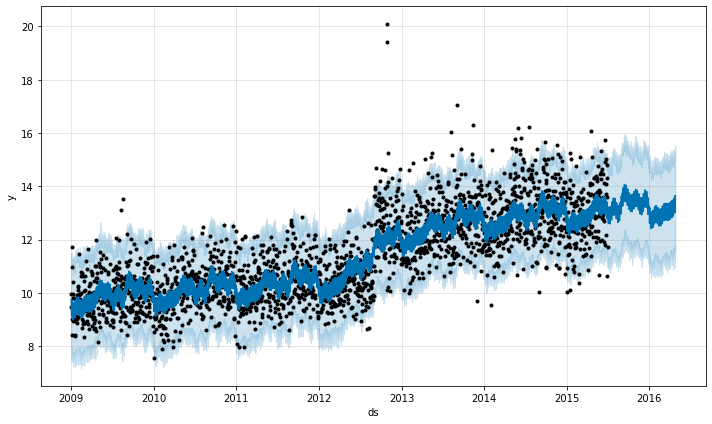

In [ ]:
fig1 = m.plot(forcast)

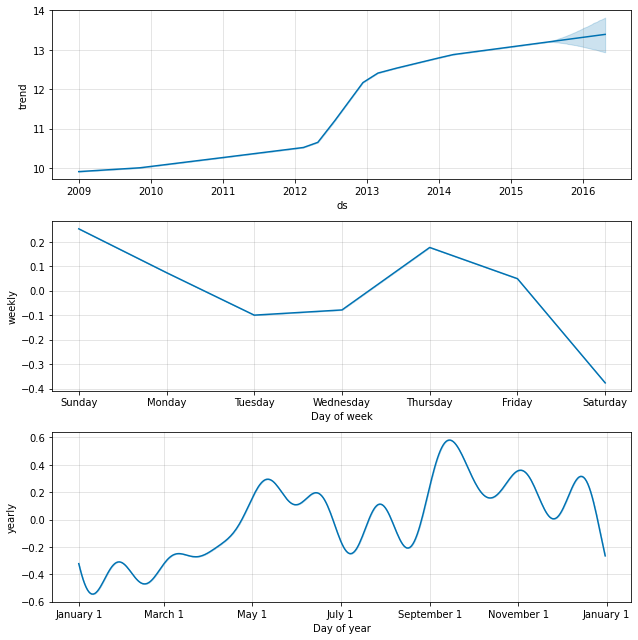

In [ ]:
fig = m.plot_components(forcast)

In [ ]:
from fbprophet.plot import plot_plotly 
import plotly.offline as py

fig = plot_plotly(m, forcast)

py.iplot(fig)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', horizon = '365 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2011-07-01 00:00:00 and 2014-06-30 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2011-07-02  10.239389    8.720151   11.757045  10.027083 2011-07-01
1 2011-07-03  10.870938    9.399066   12.242543   9.398837 2011-07-01
2 2011-07-04  10.557268    9.030063   12.236249  10.375581 2011-07-01
3 2011-07-05  10.244356    8.780573   11.645012   9.735455 2011-07-01
4 2011-07-06  10.359062    8.791596   11.766408  10.928689 2011-07-01

In [ ]:
# Validating the result of the test
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 36 days 12:00:00  0.865485  0.930315  0.725439  0.063490  0.052122  0.929412
1 37 days 00:00:00  0.879919  0.938040  0.732785  0.064108  0.052273  0.925490
2 37 days 12:00:00  0.880310  0.938248  0.732572  0.064060  0.052273  0.925490
3 38 days 00:00:00  0.879361  0.937743  0.732482  0.064053  0.052955  0.926471
4 38 days 12:00:00  0.907014  0.952373  0.741462  0.064560  0.052955  0.925490

In [ ]:
df_p.mean()

horizon     200 days 18:00:00
mse                  2.102439
rmse                  1.43168
mae                  1.128879
mape                 0.092351
mdape                0.079605
coverage              0.76176
dtype: object

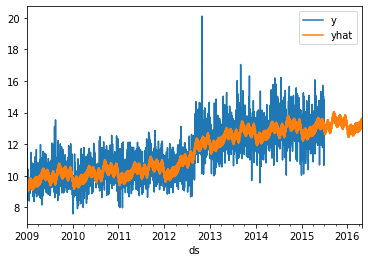

In [ ]:
pd.concat([new_df_Pr.set_index('ds')['y'], forcast.set_index('ds')['yhat']], axis=1).plot()